# Data Analysis

Importing relevant analysis tools and importing data collected over the course of an hour and stored in a SQLLite database.

In [3]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [4]:
con = sqlite3.connect("api_data.db")
df = pd.read_sql_query("SELECT * from data", con)

print(df.head())

con.close()

   factor        pi                 time
0       1  4.000000  2022-05-06 00:00:00
1       1  4.000000  2022-05-06 00:01:00
2       8  3.017072  2022-05-06 00:02:00
3      27  3.178617  2022-05-06 00:03:00
4      64  3.125969  2022-05-06 00:04:00


Transforming time column into a datetime type, and then extracting the minute into it's own column

In [5]:
df['time'] =  pd.to_datetime(df['time'], format='%Y-%m-%d %H:%M:%S')
df['minute'] = df['time'].dt.minute
print(df.head())

   factor        pi                time  minute
0       1  4.000000 2022-05-06 00:00:00       0
1       1  4.000000 2022-05-06 00:01:00       1
2       8  3.017072 2022-05-06 00:02:00       2
3      27  3.178617 2022-05-06 00:03:00       3
4      64  3.125969 2022-05-06 00:04:00       4


## Factor Column

The factor column is the minute of the timestamp to the third power likely - graphing and testing that theory.

<AxesSubplot:xlabel='minute', ylabel='factor'>

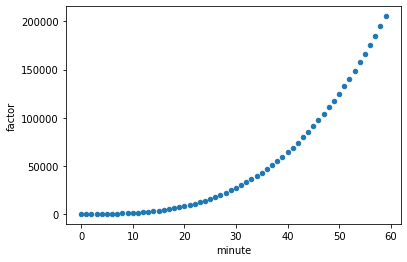

In [6]:
df.plot(kind = 'scatter', x = 'minute', y = 'factor')

Initial graph confirms this, graphing against x^3...

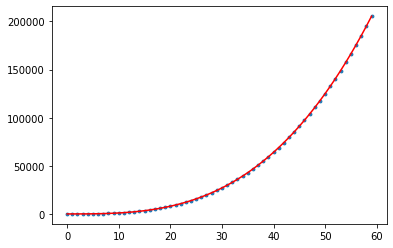

In [7]:
plt.scatter(df['minute'], df['factor'], label = "Collected Data", s=8)

x = np.arange(0, 60, 1)
y = x**3
plt.plot(x,y, color = "r", label = "x^3")
plt.show()

## Pi Column

The pi column is clearly converging to pi (3.14) and is oscillating around that value. 

Not sure what the exact function is. Googling the problem seems to point that this may be a dampened cos function - they have a factor which makes sense

https://www.calculushowto.com/calculus-definitions/damped-sine-wave/

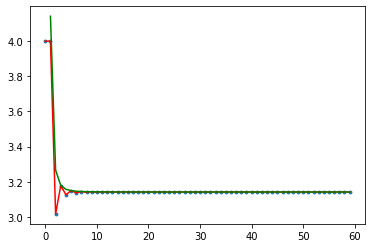

In [8]:
plt.scatter(df['minute'], df['pi'], label = "Collected Data", s=8)
plt.plot(df['minute'], df['pi'], label = "Connected", c='r')
x = np.arange(1, 60, 1)
y = (1/(x**3)) + np.pi
plt.plot(x, y, label = "factor column + pi", c='g')
plt.show()

Potential Testing reveals this isn't the case exactly, but reveals a very close correlation in the differences between the factor and the difference between pi and the actual result of the pi column

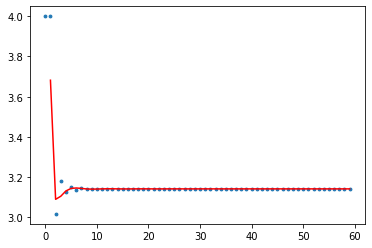

In [9]:
plt.scatter(df['minute'], df['pi'], label = "Collected Data", s=8)
x = np.arange(1, 60, 1)
x_3 = x**3
y = (1/(x**3)) * np.cos(x) + np.pi
plt.plot(x, y, label = "Theoretical", c='r')

In [10]:
df['test'] = df['pi'] - np.pi
df['test2'] = 1/df['factor']
print(df.head(30))

    factor        pi                time  minute      test     test2
0        1  4.000000 2022-05-06 00:00:00       0  0.858407  1.000000
1        1  4.000000 2022-05-06 00:01:00       1  0.858407  1.000000
2        8  3.017072 2022-05-06 00:02:00       2 -0.124521  0.125000
3       27  3.178617 2022-05-06 00:03:00       3  0.037024  0.037037
4       64  3.125969 2022-05-06 00:04:00       4 -0.015624  0.015625
5      125  3.149593 2022-05-06 00:05:00       5  0.008000  0.008000
6      216  3.136963 2022-05-06 00:06:01       6 -0.004630  0.004630
7      343  3.144508 2022-05-06 00:07:01       7  0.002915  0.002915
8      512  3.139640 2022-05-06 00:08:01       8 -0.001953  0.001953
9      729  3.142964 2022-05-06 00:09:01       9  0.001372  0.001372
10    1000  3.140593 2022-05-06 00:10:01      10 -0.001000  0.001000
11    1331  3.142344 2022-05-06 00:11:01      11  0.000751  0.000751
12    1728  3.141014 2022-05-06 00:12:02      12 -0.000579  0.000579
13    2197  3.142048 2022-05-06 00

In [18]:
df['test3'] = df['test2'] * np.cos(df['minute'] * np.pi)
df['test4'] = ((1/df['factor']) * np.cos(df['minute'] * np.pi) + np.pi
print(df.head(10))

   factor        pi                time  minute      test     test2     test3  \
0       1  4.000000 2022-05-06 00:00:00       0  0.858407  1.000000  1.000000   
1       1  4.000000 2022-05-06 00:01:00       1  0.858407  1.000000 -1.000000   
2       8  3.017072 2022-05-06 00:02:00       2 -0.124521  0.125000  0.125000   
3      27  3.178617 2022-05-06 00:03:00       3  0.037024  0.037037 -0.037037   
4      64  3.125969 2022-05-06 00:04:00       4 -0.015624  0.015625  0.015625   
5     125  3.149593 2022-05-06 00:05:00       5  0.008000  0.008000 -0.008000   
6     216  3.136963 2022-05-06 00:06:01       6 -0.004630  0.004630  0.004630   
7     343  3.144508 2022-05-06 00:07:01       7  0.002915  0.002915 -0.002915   
8     512  3.139640 2022-05-06 00:08:01       8 -0.001953  0.001953  0.001953   
9     729  3.142964 2022-05-06 00:09:01       9  0.001372  0.001372 -0.001372   

      test4  
0  4.141593  
1  2.141593  
2  3.266593  
3  3.104556  
4  3.157218  
5  3.133593  
6  3.14622